In [1]:
!pip install moviepy

In [35]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd
import numpy as np
import os

In [2]:
from moviepy.editor import VideoFileClip

# Загрузка видеофайла
video = VideoFileClip("/content/drive/MyDrive/СРИОД/animevost_1062-seriya-Van-Pis-(chast-4)-720p.mp4")

# Извлечение полного аудио
audio = video.audio
audio.write_audiofile("1062_audio.mp3")


MoviePy - Writing audio in 1062_audio.mp3


MoviePy - Done.


In [26]:
# Извлечение фрагмента аудио (например, с 1:30 до 2:15)
start_time = 162  # Начало в секундах (1 минута 30 секунд)
end_time = 164  # Конец в секундах (2 минуты 15 секунд)
audio_subclip = audio.subclip(start_time, end_time)
audio_subclip.write_audiofile(f"1062_audio_{start_time}-{end_time}.mp3")

MoviePy - Writing audio in 1062_audio_162-164.mp3


MoviePy - Done.


In [33]:
# Извлечение фрагмента аудио (например, с 1:30 до 2:15)
start_time = 248  # Начало в секундах (1 минута 30 секунд)
end_time = 249  # Конец в секундах (2 минуты 15 секунд)
audio_subclip = audio.subclip(start_time, end_time)
audio_subclip.write_audiofile(f"1062_audio_zoro_fight_{start_time}-{end_time}.mp3")

MoviePy - Writing audio in 1062_audio_zoro_fight_248-249.mp3


MoviePy - Done.


In [63]:
folder_path = '/content'

# Получаем список всех файлов в папке
audio_paths = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
audio_paths

['1062_audio_151-152.mp3',
 '1062_audio_zoro_fight_242-243.mp3',
 '1062_audio_162-164.mp3',
 '1062_audio_zoro_fight_238-239.mp3',
 '1062_audio_zoro_fight_248-249.mp3']

In [71]:
display(Audio(f"/content/1062_audio_162-164.mp3", autoplay=True))

In [65]:
audio_paths = ['1062_audio_151-152.mp3',
 '1062_audio_162-164.mp3',
 '1062_audio_zoro_fight_238-239.mp3',
  '1062_audio_zoro_fight_242-243.mp3',
 '1062_audio_zoro_fight_248-249.mp3']

descriptions = [
    "Удар ногой Санджи",
    "Сильный удар ногой Санджи",
    "Удар мечом Зорро",
    "Удар мечом Зорро",
    "Противостояние двух мечей"
]

character_names = [
    "Санджи",
    "Санджи",
    "Зорро",
    "Зорро",
    "Зорро"
]

# Создаем DataFrame
dict_ = {
    "AudioPath": audio_paths,
    "Description": descriptions,
    "CharacterName": character_names
}

data = pd.DataFrame(dict_)
data


,AudioPath,Description,CharacterName
0,1062_audio_151-152.mp3,Удар ногой Санджи,Санджи
1,1062_audio_162-164.mp3,Сильный удар ногой Санджи,Санджи
2,1062_audio_zoro_fight_238-239.mp3,Удар мечом Зорро,Зорро
3,1062_audio_zoro_fight_242-243.mp3,Удар мечом Зорро,Зорро
4,1062_audio_zoro_fight_248-249.mp3,Противостояние двух мечей,Зорро


## Обработка звуковых файлов

In [66]:
sr = 100000

In [67]:
def plot_spectrograms(file_path, emo, gender):
    y, sr = librosa.load(file_path)

    plt.figure()
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram ({name}, {descr})')
    plt.tight_layout()
    plt.show()

    plt.figure()
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram ({name}, {descr})')
    plt.tight_layout()
    plt.show()

  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)



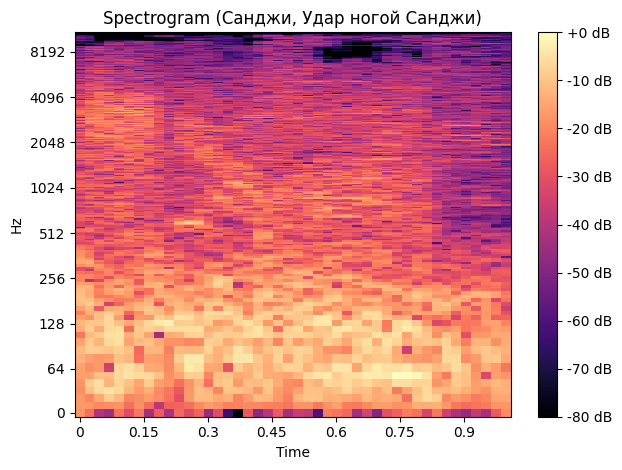

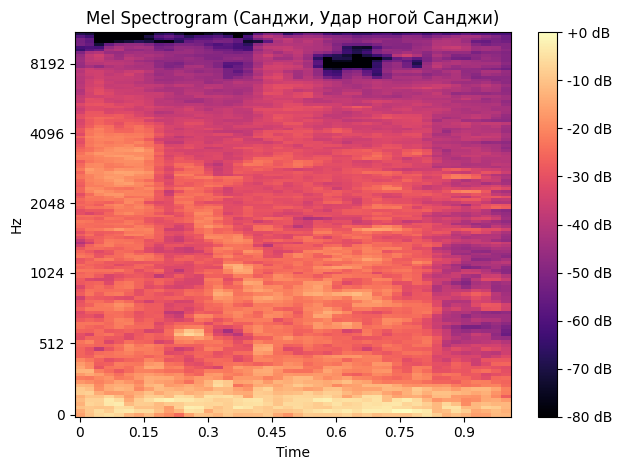

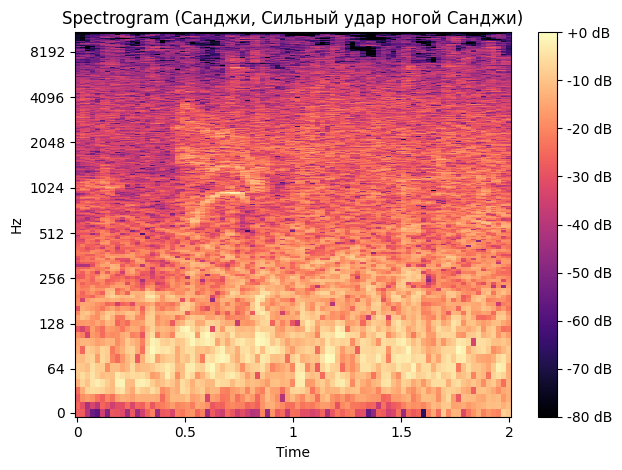

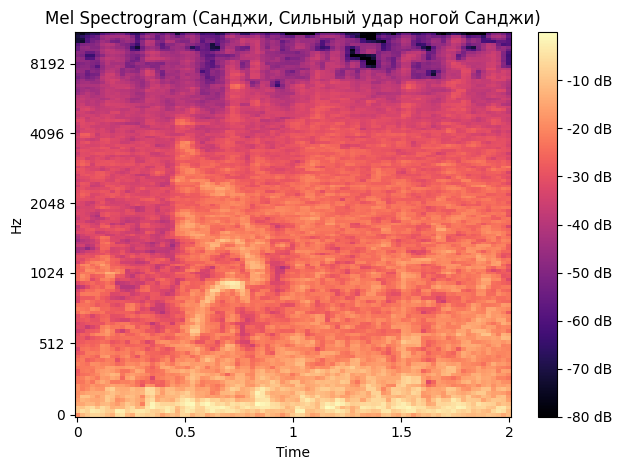

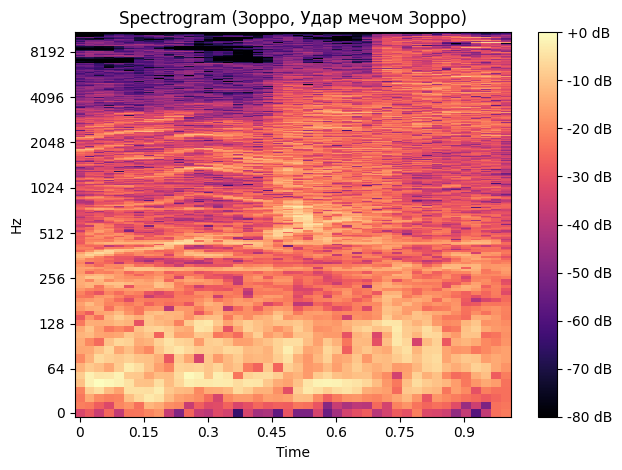

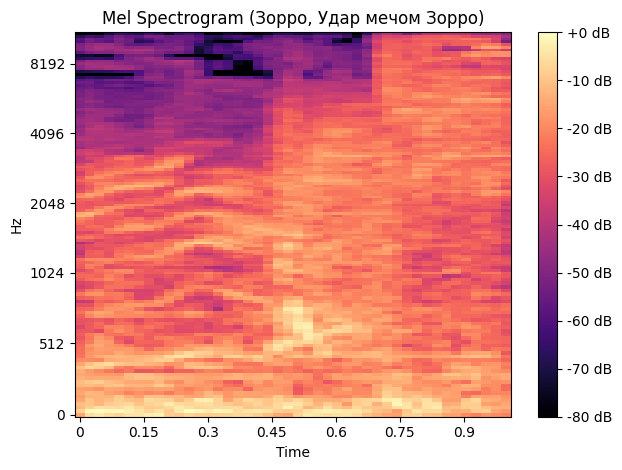

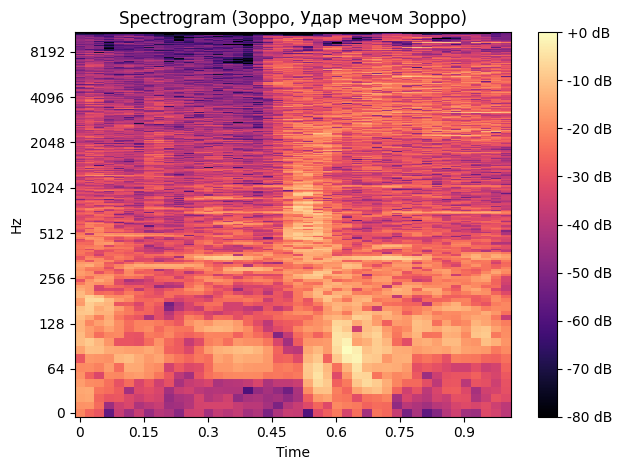

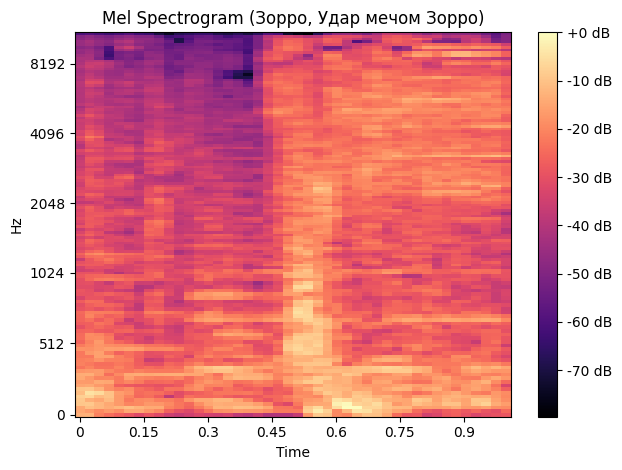

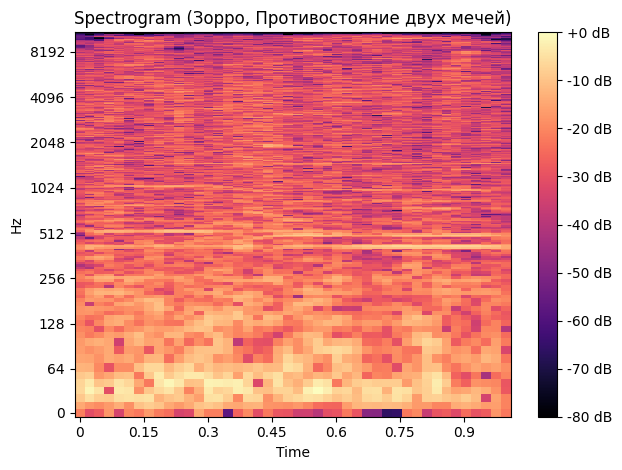

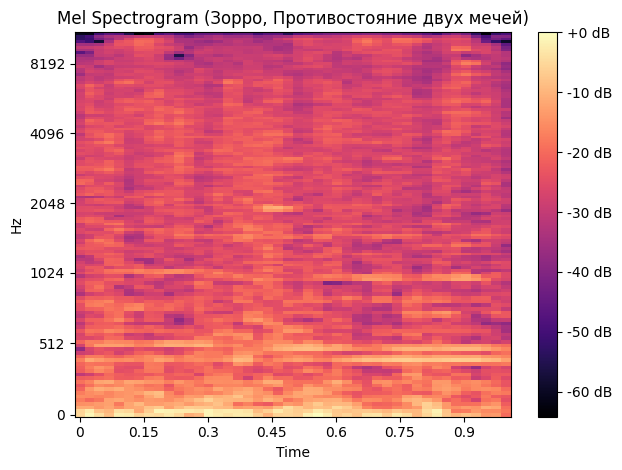

In [68]:
for index, row in data.iterrows():
    file_path = row['AudioPath']
    name = row['CharacterName']
    descr = row['Description']
    plot_spectrograms(file_path, name, descr)

In [72]:
def compute_mfcc_stats(file_path):
    y, sr = librosa.load(file_path, sr=None)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    return np.concatenate([mfcc_mean, mfcc_std])

In [73]:
mfcc_features = []
for index, row in data.iterrows():
    file_path = row['AudioPath']
    mfcc_stats = compute_mfcc_stats(file_path)
    mfcc_features.append(mfcc_stats)

In [74]:
mfcc_columns = [f'mfcc_mean_{i}' for i in range(1, 21)] + [f'mfcc_std_{i}' for i in range(1, 21)]
data_mfcc = pd.DataFrame(mfcc_features, columns=mfcc_columns)

In [75]:
data_mfcc.to_csv("1062_audio_mfcc.csv")

In [78]:
data.to_csv("1062_audio.csv", index=False, encoding='cp1251')